In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#Visualization
import matplotlib.pyplot as plt
from matplotlib import image as mg
import seaborn as sns
from tensorflow import keras

#Accuracy
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix ,plot_roc_curve,classification_report
from sklearn import metrics

In [ ]:
class_names = ["cats","dogs"]
class_names_labels = {class_names: i for i , class_names in enumerate(class_names)}

print(class_names_labels)

{'cats': 0, 'dogs': 1}


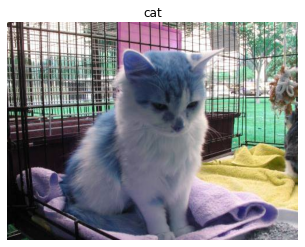

In [ ]:
image_path = "/content/drive/MyDrive/catsANDdog/training_set/cats/cat.1012.jpg"
image = cv2.imread(image_path)

plt.imshow(image)
plt.title(image_path.split(os.path.sep)[-1].split(".")[0])
plt.axis("off")
plt.show()

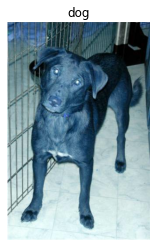

In [ ]:
image_path = "/content/drive/MyDrive/catsANDdog/training_set/dogs/dog.1.jpg"
image = cv2.imread(image_path)

plt.imshow(image)
plt.title(image_path.split(os.path.sep)[-1].split(".")[0])
plt.axis("off")
plt.show()

In [ ]:
image_shape = (128,128)

In [ ]:
def datasetLoaderFromDirectory():
    #Load Dataset from Folder
    dataset_path = ["/content/drive/MyDrive/catsANDdog/training_set/", "/content/drive/MyDrive/catsANDdog/test_set/"]
    #store data into a list for respective path
    imageDataOutput=[]
    #tag each data path file
    for i in dataset_path:
        #List for Image Data
        images=[]
        labels=[]
        print("Counting : {}".format(i))
        #for directory path
        for j in os.listdir(i):
            
            label = class_names_labels[j]
            
            for imageDataFile in tqdm(os.listdir(os.path.join(i, j))):
                    imagePath=os.path.join(os.path.join(i,j), imageDataFile)
                
                    #image read and preprocessing
                    #BGR-for opencv-imread and RGB-for matplotlib image
                    imgs = mg.imread(imagePath)
                    image2= cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
                    image= cv2.resize(image2, image_shape)
                
                    images.append(image)
                    labels.append(label)
        #to produce the image as numpy array
        images= np.array(images, dtype = "float64") #depends of OS (32/64)
        labels= np.array(labels, dtype = "float64")
            
            
        imageDataOutput.append((images, labels))
            
    return imageDataOutput

    
        


In [ ]:
(train_image,train_labels),(test_image,test_labels) = datasetLoaderFromDirectory()

Counting : /content/drive/MyDrive/catsANDdog/training_set/


100%|██████████| 4000/4000 [01:47<00:00, 37.11it/s] 


Counting : /content/drive/MyDrive/catsANDdog/test_set/


100%|██████████| 1011/1011 [00:34<00:00, 29.70it/s] 


In [ ]:
train_image,train_labels = shuffle(train_image,train_labels,random_state = 42)

In [ ]:
_,trainImageLabelInfo = np.unique(train_labels,return_counts = True)
_,testImageLabelInfo = np.unique(test_labels,return_counts = True)



In [ ]:
print(f"Train image label info for 0 class : {trainImageLabelInfo[0]}")
print(f"Train image label info for 1 class : {trainImageLabelInfo[1]}")
print("----")
print(f"Test image label info for 0 class : {testImageLabelInfo[0]}")
print(f"Test image label info for 1 class : {testImageLabelInfo[1]}")

Train image label info for 0 class : 4000
Train image label info for 1 class : 4005
----
Test image label info for 0 class : 1011
Test image label info for 1 class : 1012


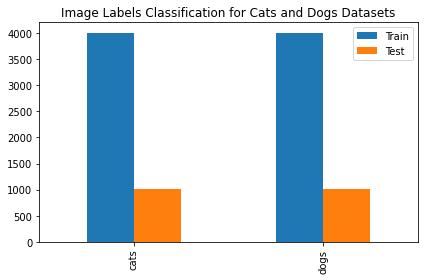

In [ ]:
#Creating Dataframe for storing image labels metadata
#Using Dictionary concept

pd.DataFrame({"Train":trainImageLabelInfo,
              "Test":testImageLabelInfo},
             index = class_names
             ).plot.bar()

plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()
plt.show()


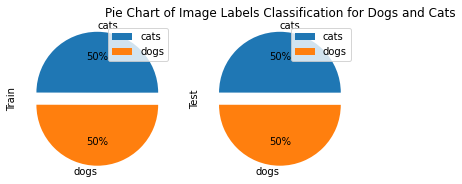

In [ ]:
pd.DataFrame({"Train": trainImageLabelInfo,
              "Test": testImageLabelInfo},
               index = class_names).plot.pie(subplots=True,  autopct='%1.0f%%',explode=([0.1,0.1]))
plt.title("Pie Chart of Image Labels Classification for Dogs and Cats")
#plt.tight_layout()
plt.show()


In [ ]:
#Read one image features 
imageFeature = train_image[0]

np.unique(imageFeature)

array([  0.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
       145., 146., 147., 148., 149., 150., 151., 15

In [ ]:
train_image.shape

(8005, 128, 128, 3)

In [ ]:
test_image.shape

(2023, 128, 128, 3)

In [ ]:
#Read an image after Scalling

def ImageVisualization(classNames,imagePath,imageLabel):
  #creating an index fo individual Image
  index = np.random.randint(imagePath.shape[0])

  plt.imshow(imagePath[index].astype('uint8'))
  
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.tight_layout()

  plt.title(f"Index of this image is : {index} And class is : {classNames[int(imageLabel[index])]}")
  plt.show()

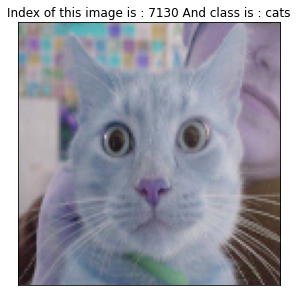

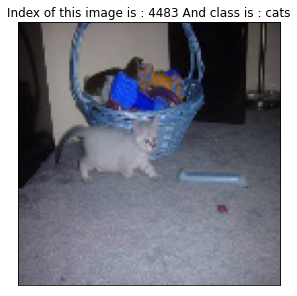

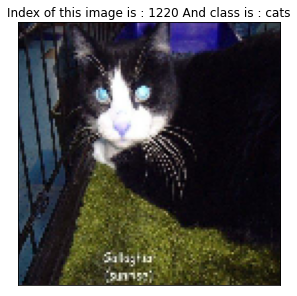

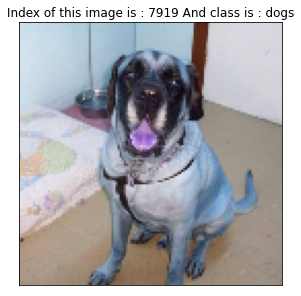

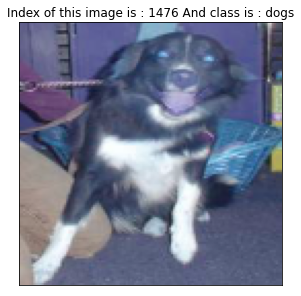

In [ ]:
for i in range(1,6):
  ImageVisualization(class_names,train_image,train_labels)


In [ ]:
# Home Work: Visualize Image at shape of (3, 3)
# Now Read an image after Scalling
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i].astype('uint8'), cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

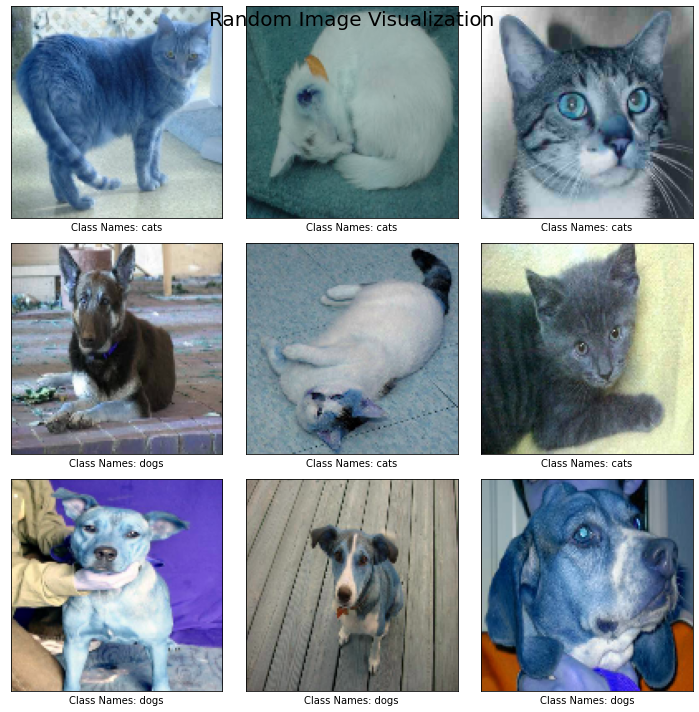

In [ ]:
ImageVisualization2(class_names,train_image,train_labels)

In [ ]:
model = Sequential([
    #input layer
    Conv2D(64, (3,3), activation ="relu", input_shape =(128,128,3)), #inputs:32, kernal_size=3,3
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    
    #1st hidden layer
    Conv2D(128, (3,3), activation ="relu"), #Dense:32, kernal_size=3,3
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    
    #2nd hidden layer
    Conv2D(196, (3,3), activation ="relu"), #Dense:32, kernal_size=3,3
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    
    #3rd hidden layer
    Conv2D(256, (3,3), activation ="relu"), #Dense:32, kernal_size=3,3
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),


    #Flattten layer (1D)
    Flatten(),
    
    #Connected layer
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax") #2 classes Dogs and Cats
    
])



In [ ]:
model.build(input_shape=(128,128,3))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 196)       225988    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 196)      0

In [ ]:
model.layers

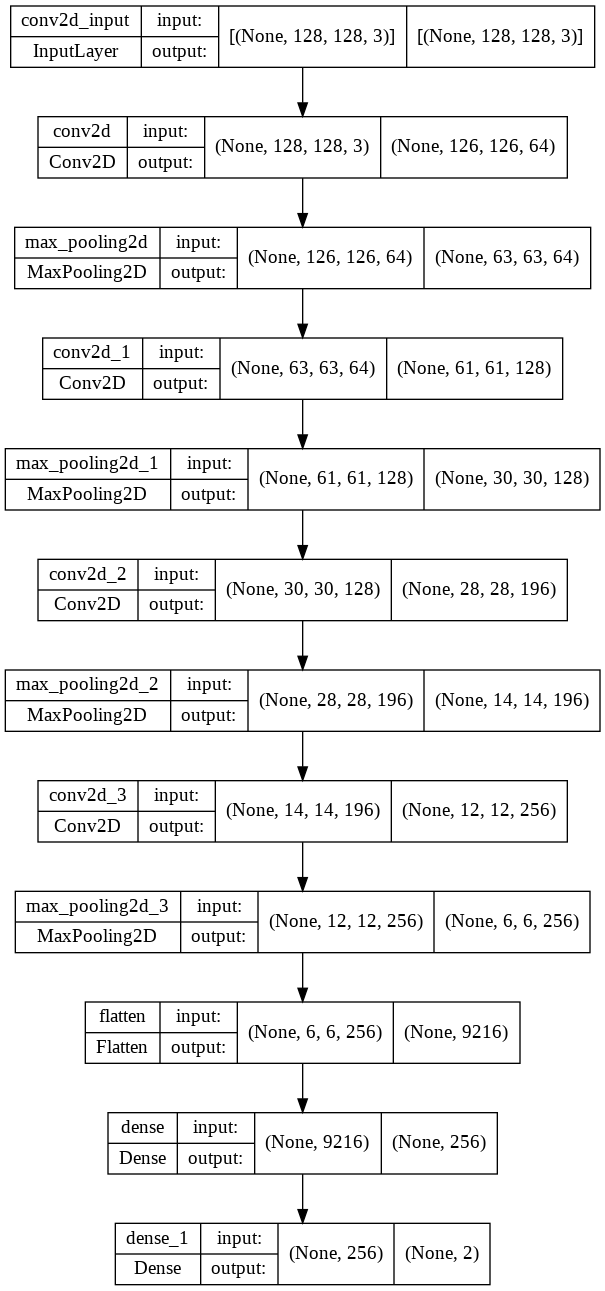

In [ ]:
keras.utils.plot_model(model,"model.png",show_shapes=True)

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"])

In [ ]:
modelHistory = model.fit(
    train_image,
    train_labels,
    epochs = 4,
    batch_size = 128,
    validation_split =0.2)


Epoch 1/4
51/51 [==============================] - 541s 11s/step - loss: 9.5170 - accuracy: 0.5409 - val_loss: 0.6886 - val_accuracy: 0.5615
Epoch 2/4
51/51 [==============================] - 542s 11s/step - loss: 0.6682 - accuracy: 0.5945 - val_loss: 0.6828 - val_accuracy: 0.5721
Epoch 3/4
51/51 [==============================] - 540s 11s/step - loss: 0.6587 - accuracy: 0.6173 - val_loss: 0.6418 - val_accuracy: 0.6340
Epoch 4/4
51/51 [==============================] - 544s 11s/step - loss: 0.6224 - accuracy: 0.6487 - val_loss: 0.7988 - val_accuracy: 0.5397


In [ ]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()


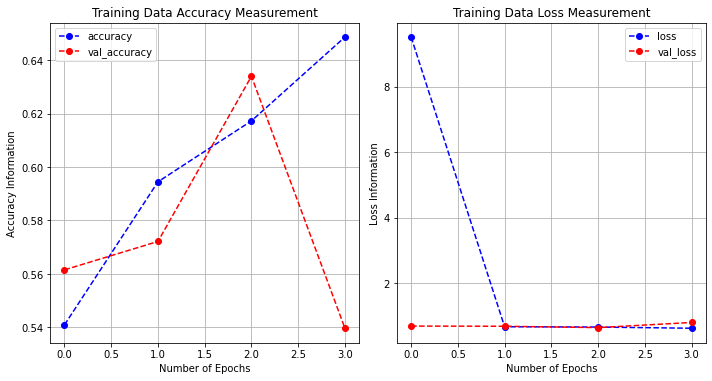

In [ ]:
accuracy_and_loss_Plot(modelHistory)

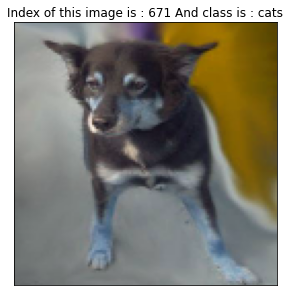

In [ ]:
predictedData = model.predict(test_image)
predictedDataLabels = np.argmax(predictedData, axis = 1)
ImageVisualization(class_names, test_image, predictedDataLabels)

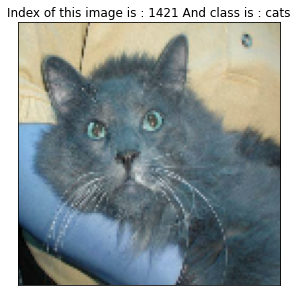

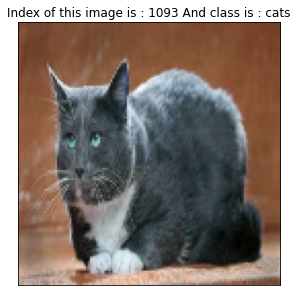

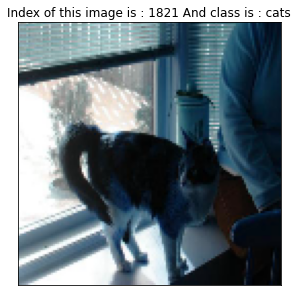

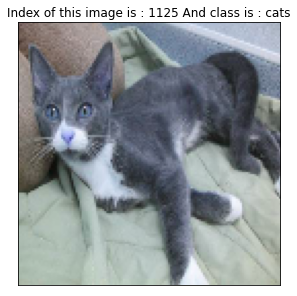

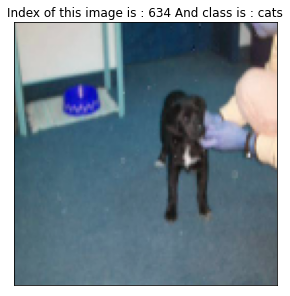

In [ ]:
for i in range(1, 6):
    ImageVisualization(class_names, test_image, predictedDataLabels)

In [ ]:
#Now read an image after Scalling
def ImageVisualization3(classNames, imagePath, imagelabel, actual_label):
    #create index for indivisual Image and index will be genarated in random order
    #we will identify image using feature metrics
    index= np.random.randint(imagePath.shape[0]) #index is always integers and choose index randomly
    #print(index) #---- to check index float/int(it's int)
    plt.figure() #define frame size
    plt.imshow(imagePath[index].astype('uint8'))
    
    plt.xticks([]) #X-label positioning
    plt.yticks([])  #Y-label poitioning
    plt.grid(False)
    plt.tight_layout()
    #{} use to pass the index values and + use to concat the label of actual image
    plt.title("Index of this Image is: {}".format(index) + " And Predicted Class is: " 
              + class_names[int(imagelabel[index])]
              + ". Actual  is: " + class_names[int(actual_label[index])]) #train_images is float
    plt.show()

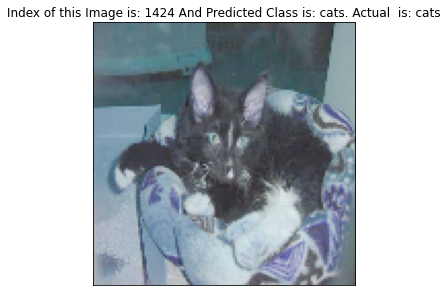

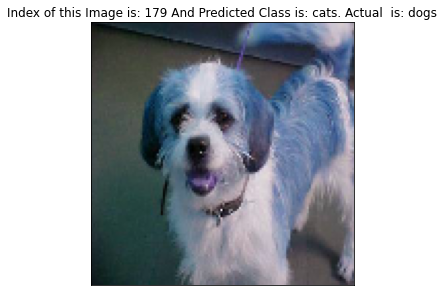

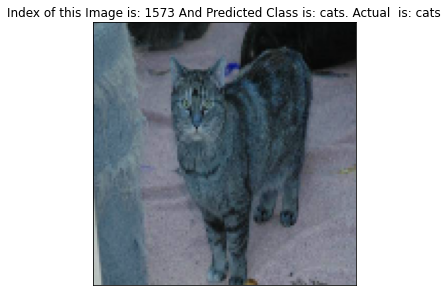

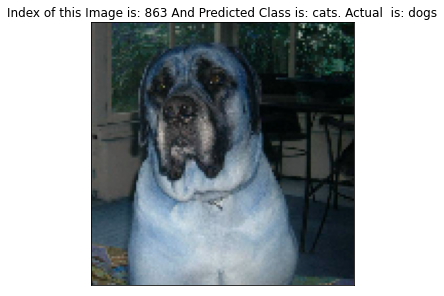

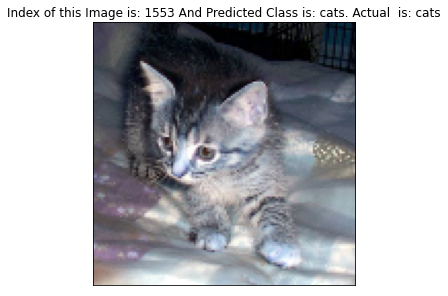

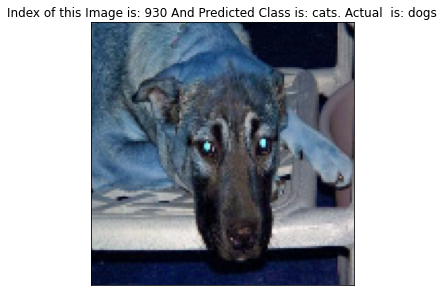

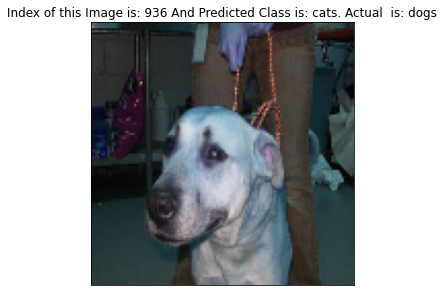

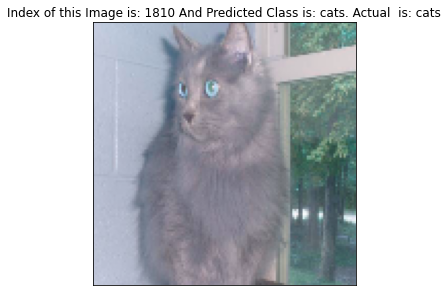

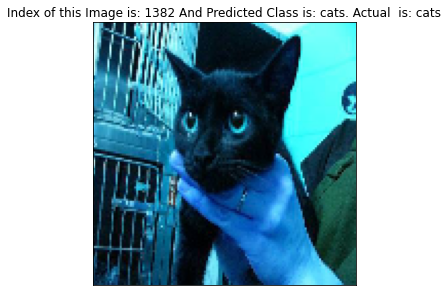

In [ ]:


#Predicted vs Test Class
for i in range(1,10):
    ImageVisualization3(class_names, test_image, predictedDataLabels, test_labels)



In [ ]:
#Performance Mesurment

cm = confusion_matrix(test_labels,predictedDataLabels)

In [ ]:
#AUC
def roc_auc(predictions,target):
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

print(f"Auc Score : {roc_auc(predictedDataLabels,test_labels)}")

Auc Score : 0.5375425653776834


In [ ]:
cm

array([[997,  14],
       [922,  90]])

In [ ]:


tp,fn,fp,tn = confusion_matrix(test_labels,predictedDataLabels).reshape(-1)

In [ ]:
#Precision of Postive Predictive Value as PPPV

pppv = tp/(tp+fp)
pppv

0.5195414278269932

In [ ]:
#Sensitivity , Recall Hit Rate

secsitivity = tp/(tp+fn)
secsitivity

0.9861523244312562

In [ ]:
#Flase Positive Rate or 1-Specificity
fpr = fp/(fp+tn)
fpr

0.9110671936758893

In [ ]:
#Threat Score , Critical Success or Index
threat_score = tp/(tp+fn+fp)
threat_score

0.5157785825142266

In [ ]:
# False Discovery Rate

fdr = fp/(tp+fp)
fdr

0.48045857217300675

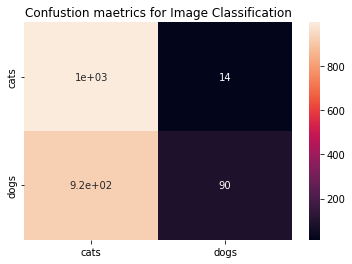

In [ ]:
ax = plt.axes()
sns.heatmap(cm, annot=True, 
           annot_kws={'size':10}, 
           xticklabels=class_names,
           yticklabels=class_names, 
           ax = ax)

plt.title("Confustion maetrics for Image Classification")
plt.show()